In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb
import tensorflow as tf
from tensorflow.keras import layers
import shap

In [9]:
clinical_file_path = 'C:/Users/Monica Jayakumar/hackathon/Dataset/Clinical_data.xlsx'
morph_file_path = 'C:/Users/Monica Jayakumar/hackathon/Dataset/Morph.xlsx'

In [10]:
clinical_data = pd.read_excel(clinical_file_path)
morph_data = pd.read_excel(morph_file_path)

In [11]:
# Step 2: Standardize Patient ID
clinical_data['Patient ID'] = clinical_data['Patient ID'].astype(str).str.zfill(6)
morph_data['Patient ID'] = morph_data['Patient ID'].astype(str).str.zfill(6)



In [12]:
# Step 3: Merge Datasets
merged_df = pd.merge(clinical_data, morph_data, on='Patient ID', how='inner')

In [13]:
print(merged_df)

     Patient ID  Age at RM1  Sex  GPA  id    Type  Subtype  \
0        010005        40.0  1.0  1.0   1.0   1.0      1.0   
1        010005        40.0  1.0  1.0   1.0   1.0      1.0   
2        010005        40.0  1.0  1.0   1.0   1.0      1.0   
3        010005        40.0  1.0  1.0   1.0   1.0      1.0   
4        010005        40.0  1.0  1.0   1.0   1.0      1.0   
...         ...         ...  ...  ...   ...   ...      ...   
1554     040184        59.0  1.0  2.0   1.0   1.0      2.0   
1555     040184        59.0  1.0  2.0   1.0   1.0      2.0   
1556     040184        59.0  1.0  2.0   1.0   1.0      2.0   
1557     040185        67.0  1.0  2.5   1.0   1.0      2.0   
1558     040185        67.0  1.0  2.5   1.0   1.0      2.0   

      WBRT (1) Dose/Frac  WBRT (1) Nfrac WBRT (1) Begin  ... MAGNETIC FIELD  \
0                    3.0            10.0              0  ...            1.5   
1                    3.0            10.0              0  ...            1.5   
2                 

In [14]:
# Drop duplicate or irrelevant columns if necessary (e.g., Patient ID after merging)
#merged_df.drop(columns=['Patient ID'], inplace=True)

In [15]:
import random

In [21]:
if 'Patient ID' not in merged_df.columns or 'Cause' not in merged_df.columns:
    raise ValueError("The dataset must include 'Patient ID' and 'Cause' columns.")

In [22]:
# Step 2: Randomly pick 10 unique patients
unique_patients = merged_df['Patient ID'].unique()
if len(unique_patients) < 10:
    raise ValueError("There are fewer than 10 unique patients in the dataset.")

In [23]:
# Select 10 random patients
random_patients = random.sample(list(unique_patients), 10)

In [24]:
# Step 3: Update the 'Cause' column for these patients
# Set 'Cause' to 0 or a custom value indicating "alive"
merged_df.loc[merged_df['Patient ID'].isin(random_patients), 'Cause'] = 0

In [25]:
# Step 4: Verify the changes
print("Patients marked as alive (Cause = 0):")
print(merged_df[merged_df['Patient ID'].isin(random_patients)][['Patient ID', 'Cause']])

Patients marked as alive (Cause = 0):
     Patient ID Cause
12       010020     0
13       010020     0
14       010020     0
15       010020     0
16       010020     0
...         ...   ...
1469     040153     0
1470     040153     0
1551     040183     0
1552     040183     0
1553     040183     0

[280 rows x 2 columns]


In [26]:
# # Optional: Save the updated dataset
# updated_dataset_path = 'updated_merged_data.csv'
# merged_df.to_csv(updated_dataset_path, index=False)
# print(f"Updated dataset saved as: {updated_dataset_path}")

Updated dataset saved as: updated_merged_data.csv


In [28]:
# Step 1: Define the Event Column
# Event = 1 if Cause is 'Death' or Occurrence is 1, otherwise Event = 0
merged_df['Event'] = ((merged_df['Cause'] == 'Death') | (merged_df['Ocurrence'] == 1)).astype(int)

In [29]:
#Define the Survival Time
# Use the 'Time' column directly as survival days
merged_df['Survival Time'] = merged_df['Time.1']

In [49]:
# Step 3: Create a Survival DataFrame with Patient ID
survival_data = merged_df[['Patient ID', 'Survival Time', 'Event']].dropna()

In [50]:
#Inspect the Processed Data
print("Processed Survival Data:")
print(survival_data.head())

Processed Survival Data:
  Patient ID  Survival Time  Event
0     010005         1084.0      1
1     010005         1084.0      1
2     010005         1084.0      1
3     010005         1084.0      1
4     010005         1084.0      1


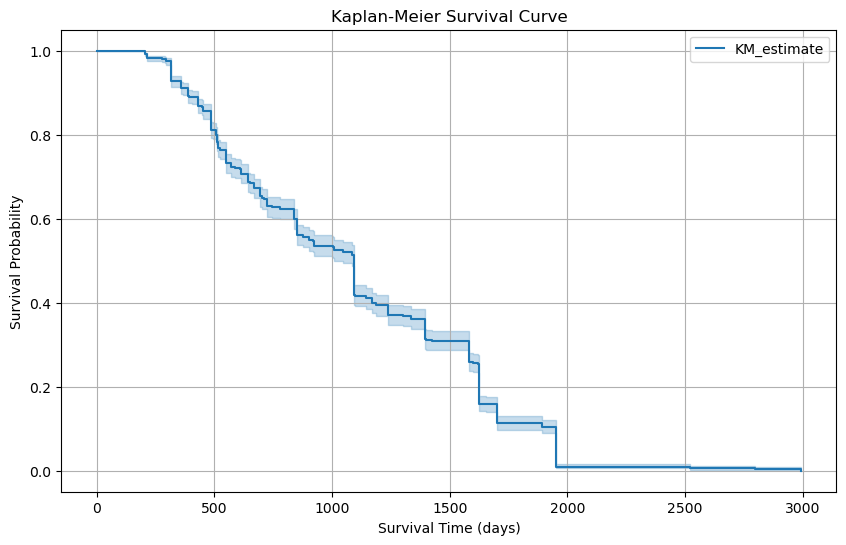

Sample of patients and their survival analysis data:
  Patient ID  Survival Time  Event
0     010005         1084.0      1
1     010005         1084.0      1
2     010005         1084.0      1
3     010005         1084.0      1
4     010005         1084.0      1


In [51]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# Fit the Kaplan-Meier model
kmf = KaplanMeierFitter()
kmf.fit(durations=survival_data['Survival Time'], event_observed=survival_data['Event'])

# Plot the survival curve
plt.figure(figsize=(10, 6))
kmf.plot_survival_function()
plt.title('Kaplan-Meier Survival Curve')
plt.xlabel('Survival Time (days)')
plt.ylabel('Survival Probability')
plt.grid()
plt.show()

# Link Kaplan-Meier analysis back to specific patients
print("Sample of patients and their survival analysis data:")
print(survival_data[['Patient ID', 'Survival Time', 'Event']].head())


In [52]:
# Step 5: Save the Prepared Data for Survival Analysis
prepared_data_path = 'prepared_survival_data.csv'
survival_data.to_csv(prepared_data_path, index=False)
print(f"Prepared survival data saved as: {prepared_data_path}")

Prepared survival data saved as: prepared_survival_data.csv


In [53]:
print(survival_data)

     Patient ID  Survival Time  Event
0        010005         1084.0      1
1        010005         1084.0      1
2        010005         1084.0      1
3        010005         1084.0      1
4        010005         1084.0      1
...         ...            ...    ...
1554     040184          523.0      1
1555     040184          523.0      1
1556     040184          523.0      1
1557     040185          652.0      1
1558     040185          652.0      1

[1559 rows x 3 columns]


In [67]:
def get_survival_days(patient_id, data):
    """
    Retrieve survival days and event status for a given Patient ID.
    
    Parameters:
        patient_id (str): The Patient ID to search for.
        data (pd.DataFrame): The survival data containing 'Patient ID', 'Survival Time', and 'Event'.
    
    Returns:
        str: Survival details for the patient.
    """
    # Ensure Patient ID is treated as a string for filtering
    data['Patient ID'] = data['Patient ID'].astype(str)
    patient_id = str(patient_id)
    
    # Filter the DataFrame for the given Patient ID
    patient_data = data[data['Patient ID'] == patient_id]
    
    if patient_data.empty:
        return f"Patient ID {patient_id} not found in the dataset."
    
    # Retrieve survival time and event
    survival_time = patient_data['Survival Time'].values[0]
    event_status = patient_data['Event'].values[0]
    
    # Corrected status description
    event_description = "Patient is alive (Censored)" if event_status == 0 else "Patient has died (Event Occurred)"
    
    return f"Patient ID: {patient_id}, Survival Days: {survival_time}, Status: {event_description}"


In [69]:
print("Columns in survival_data:")
print(survival_data.columns.tolist())


Columns in survival_data:
['Patient ID', 'Survival Time', 'Event']


In [68]:
# Test the function with the survival_data DataFrame
sample_patient_id = "010020"  # Replace with the Patient ID you want to test
result = get_survival_days(sample_patient_id, survival_data)
print(result)


Patient ID: 010020, Survival Days: 1625.0, Status: Patient has died (Event Occurred)


In [16]:
# Step 4: Handle Missing Values
# Fill numeric columns with the mean and forward-fill for other columns
merged_df.fillna(merged_df.mean(numeric_only=True), inplace=True)  # Numeric columns
merged_df.fillna(method='ffill', inplace=True)  # Forward fill for categorical columns

C:\Users\Monica Jayakumar\AppData\Local\Temp\ipykernel_31184\2493731713.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df.fillna(method='ffill', inplace=True)  # Forward fill for categorical columns


In [17]:
# Step 5: Inspect the Data
print("Merged DataFrame:")
print(merged_df.head())
print(f"Shape of merged data: {merged_df.shape}")

Merged DataFrame:
  Patient ID  Age at RM1  Sex  GPA  id    Type  Subtype  WBRT (1) Dose/Frac  \
0     010005        40.0  1.0  1.0   1.0   1.0      1.0                 3.0   
1     010005        40.0  1.0  1.0   1.0   1.0      1.0                 3.0   
2     010005        40.0  1.0  1.0   1.0   1.0      1.0                 3.0   
3     010005        40.0  1.0  1.0   1.0   1.0      1.0                 3.0   
4     010005        40.0  1.0  1.0   1.0   1.0      1.0                 3.0   

   WBRT (1) Nfrac WBRT (1) Begin  ... MAGNETIC FIELD  LESION  TOTALVOLUME  \
0            10.0              0  ...            1.5       1     0.162125   
1            10.0              0  ...            1.5       1     0.372887   
2            10.0              0  ...            1.5       3     1.604080   
3            10.0              0  ...            1.5       1     2.336502   
4            10.0              0  ...            1.5       3     3.134727   

   CEVOLUME NECVOLUME  CERIMWIDTH  MAXDIAMET

In [18]:
# # Step 6: Save the Merged Data for Further Analysis
# output_path = 'merged_data.csv'
# merged_df.to_csv(output_path, index=False)
# print(f"Merged data saved as: {output_path}")

In [19]:
pip install lifelines


In [20]:
# Step 1: Define Event Column
# If 'Cause' is 'Death' or 'Occurrence' is 1, the event occurred
merged_df['Event'] = ((merged_df['Cause'] == 'Death') | (merged_df['Occurrence'] == 1)).astype(int)

# Step 2: Use 'Time' as Survival Time
# Assuming 'Time' represents the survival days
merged_df['Survival Time'] = merged_df['Time.1']

# Step 3: Inspect the Result
print("Sample rows with Survival Time and Event columns:")
print(merged_df[['Survival Time', 'Event', 'Cause', 'Occurrence']].head())

# Drop any rows with missing Survival Time or Event for analysis
survival_data = merged_df[['Survival Time', 'Event']].dropna()

# Step 4: Save the Prepared Data for Survival Analysis
output_path = 'prepared_survival_data.csv'
survival_data.to_csv(output_path, index=False)
print(f"Prepared survival data saved as: {output_path}")


KeyError: 'Occurrence'

In [ ]:
# # Step 1: Remove unwanted or problematic columns
# # Dropping unnecessary columns if they exist
# X = merged_df.drop(columns=['deathTime'], errors='ignore')
# y = merged_df['deathTime']


# # Step 2: Check for non-numeric columns
# non_numeric_columns = X.select_dtypes(exclude=['number']).columns
# if len(non_numeric_columns) > 0:
#     print(f"Non-numeric columns found: {non_numeric_columns}")

# # Convert categorical or string columns to numeric (if any exist)
# X = pd.get_dummies(X, drop_first=True)

# # Step 3: Handle remaining unexpected values
# # Replace problematic strings like ' ' with NaN, then impute with mean
# X.replace(' ', np.nan, inplace=True)
# X.fillna(X.mean(numeric_only=True), inplace=True)

# # Step 4: Standardize numerical features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# print("Feature scaling completed successfully.")



KeyError: 'deathTime'

In [10]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


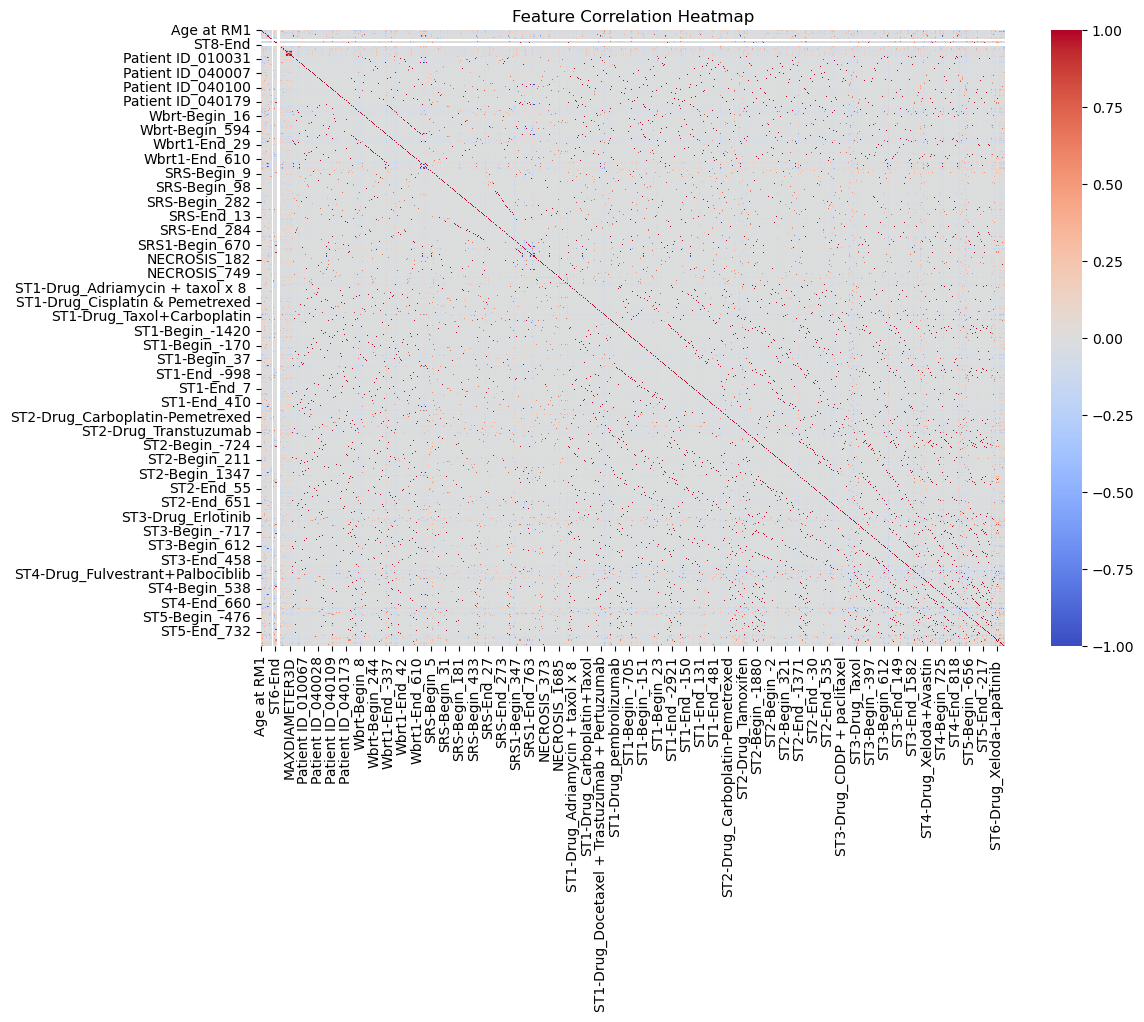

In [11]:
# Step 4: Exploratory Data Analysis
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pd.DataFrame(X_scaled, columns=X.columns).corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

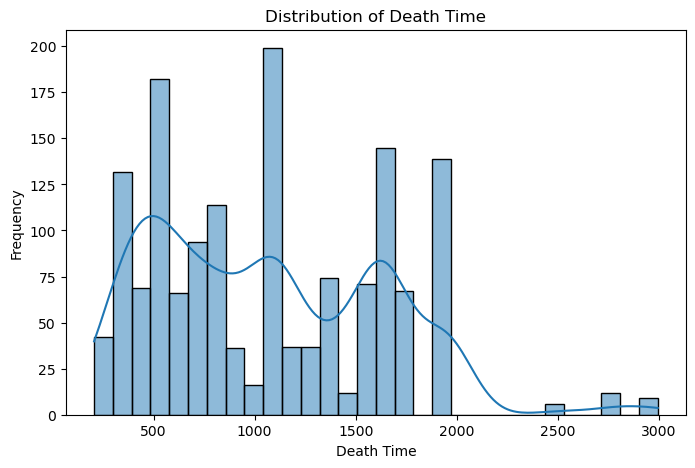

In [12]:
# Distribution of the target variable
plt.figure(figsize=(8, 5))
sns.histplot(y, kde=True, bins=30)
plt.title("Distribution of Death Time")
plt.xlabel("Death Time")
plt.ylabel("Frequency")
plt.show()

In [13]:
# Check for missing values in the target variable
missing_y = y.isnull().sum()
print(f"Missing values in y: {missing_y}")

if missing_y > 0:
    # Remove rows with NaN in the target variable
    data_no_nan = merged_df.dropna(subset=['deathTime'])
    
    # Re-split features (X) and target (y)
    X = data_no_nan.drop(columns=['deathTime'], errors='ignore')
    y = data_no_nan['deathTime']
    
    # Standardize numerical features
    X = pd.get_dummies(X, drop_first=True)  # Handle categorical features
    X_scaled = scaler.fit_transform(X)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)




Missing values in y: 0


In [14]:
# Step 5: Model Training and Evaluation
# LightGBM model
lgb_model = lgb.LGBMRegressor(device='gpu')
lgb_model.fit(X_train, y_train)
_

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 3220
[LightGBM] [Info] Number of data points in the train set: 1247, number of used features: 276
[LightGBM] [Info] Using GPU Device: Intel(R) UHD Graphics, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 33 dense feature groups (0.04 MB) transferred to GPU in 0.015142 secs. 1 sparse feature groups
[LightGBM] [Info] Start training from score 1063.618198


,Patient ID,TIME POINT,PIXELSPACING,SBS,STH,STATION NAME,REPTIME,ECHOTIME,MAGNETIC FIELD,LESION,TOTALVOLUME,CEVOLUME,NECVOLUME,CERIMWIDTH,MAXDIAMETER3D,TOTALSURFACE,RENDVOLUME,SURFACEREGULARITY
0,010005,19010618,0.976562,1.0,2.0,Philips Medical Systems,25.0,5.139,1.5,1,0.162125,0.162125,0.000000,0.338262,0.783567,1.665688,0.154416,0.763884
1,010005,19011011,0.976562,1.0,2.0,Philips Medical Systems,25.0,4.962,1.5,1,0.372887,0.372887,0.000000,0.446508,1.103769,2.967784,0.362992,0.755049
2,010005,19011011,0.976562,1.0,2.0,Philips Medical Systems,25.0,4.962,1.5,3,1.604080,0.498772,1.105309,0.084779,2.214020,8.795319,1.586278,0.646738
3,010005,19020128,0.976562,1.0,2.0,Philips Medical Systems,25.0,5.192,1.5,1,2.336502,2.335548,0.000954,0.762114,1.980714,10.094219,2.316435,0.768135
4,010005,19020128,0.976562,1.0,2.0,Philips Medical Systems,25.0,5.192,1.5,3,3.134727,1.180649,1.954079,0.132334,2.564806,13.813849,3.109892,0.644168


In [ ]:
# Predictions and evaluation
y_pred_train = lgb_model.predict(X_train)
y_pred_test = lgb_model.predict(X_test)

train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Train MSE: {train_mse}, Train R2: {train_r2}")
print(f"Test MSE: {test_mse}, Test R2: {test_r2}")

Train MSE: 4226.426614394587, Train R2: 0.9865333276845646
Test MSE: 16679.84854530425, Test R2: 0.9531321211917306


c:\Users\Monica Jayakumar\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 1400055.0000 - mae: 1047.9094 - val_loss: 1416454.0000 - val_mae: 1038.2020
Epoch 2/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1186016.6250 - mae: 956.9519 - val_loss: 841301.0000 - val_mae: 764.3907
Epoch 3/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 515190.1562 - mae: 577.9781 - val_loss: 236781.2500 - val_mae: 308.0783
Epoch 4/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 127510.8594 - mae: 231.1030 - val_loss: 159914.6875 - val_mae: 243.6809
Epoch 5/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 74111.8594 - mae: 184.1705 - val_loss: 125858.1953 - val_mae: 214.4184
Epoch 6/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 83885.7422 - mae: 188.4605 - val_loss: 106154.5391 - val_mae: 199.3815
Epoch 7/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 69494.8438 - mae: 172.5221 - val_loss: 94817.6641 - val_mae: 189.4291
Epoch 8/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 55361.4922 - mae: 159.7268 - v

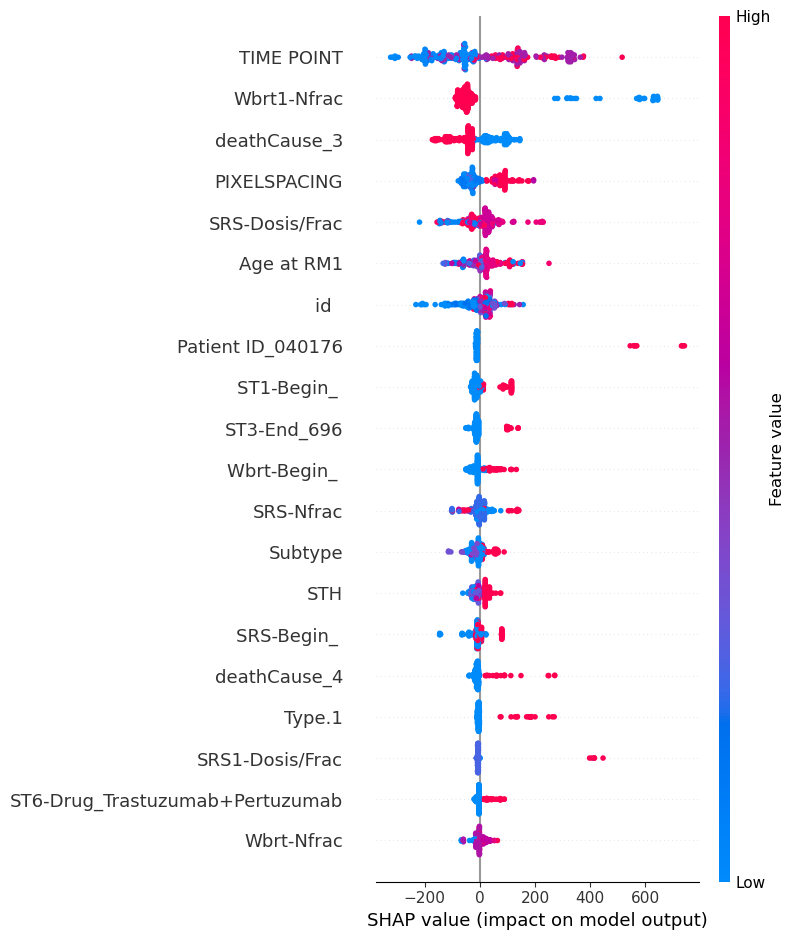

Sample Prediction: [1260.76038252]


In [16]:
# Step 6: Neural Network Model
nn_model = tf.keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1)
])
nn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
nn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)

# Step 7: Explainability with SHAP
explainer = shap.TreeExplainer(lgb_model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, feature_names=X.columns)

# Step 8: Save the Best Model
import joblib
joblib.dump(lgb_model, "best_lgbm_model.pkl")

# Sample Prediction
sample_data = X_test[0].reshape(1, -1)
prediction = lgb_model.predict(sample_data)
print(f"Sample Prediction: {prediction}")

In [17]:
def predict_survival(patient_id, original_data, model, scaler):
    """
    Predict survival data (deathTime) for a given Patient ID.

    Parameters:
        patient_id (str): The Patient ID for which prediction is required.
        original_data (pd.DataFrame): The original dataset before preprocessing.
        model: The trained model (e.g., LightGBM).
        scaler: The StandardScaler used during training.

    Returns:
        str: Predicted survival data or an error message.
    """
    # Retrieve the row corresponding to the given Patient ID
    patient_data = original_data[original_data['Patient ID'] == patient_id]
    
    if patient_data.empty:
        return f"Patient ID {patient_id} not found in the dataset."

    # Drop unnecessary columns (including Patient ID and target variable)
    X_patient = patient_data.drop(columns=['deathTime', 'Patient ID'], errors='ignore')

    # Handle categorical variables
    X_patient = pd.get_dummies(X_patient, drop_first=True)

    # Align columns with training data
    X_patient = pd.DataFrame(X_patient, columns=X.columns, index=patient_data.index).fillna(0)

    # Standardize the features
    X_patient_scaled = scaler.transform(X_patient)

    # Make prediction
    predicted_survival = model.predict(X_patient_scaled)
    return f"Predicted survival (deathTime) for Patient ID {patient_id}: {predicted_survival[0]:.2f} days."


In [ ]:
# Assuming the trained model, scaler, and merged_df are available
clinical_data = "010005"  # Replace with an actual Patient ID from your dataset
result = predict_survival(clinical_data, merged_df, lgb_model, scaler)
print(result)


Predicted survival (deathTime) for Patient ID 010005: 1069.84 days.


In [27]:
RangeIndex(start=0, stop=100, step=1)

NameError: name 'RangeIndex' is not defined